# KMeans

## Eduardo Vazquez Rodriguez

**objetivo:** Implementar manualmente el algoritmo de K-means en un conjunto de datos específico utilizado en clase (culquiera de los 3 ejemplos), con la finalidad de comprender cómo funciona el algoritmo sin el uso de las bibliotecas, cómo se actualizan los centroides en cada iteración, y cómo se asignan los puntos a los clusters más cercanos.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random as rd


data = pd.read_csv(r'C:\Users\mazlt\Desktop\Repositorio GitHub\data\Wholesale.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [61]:
# eliminsr columnas no utiles
columns_to_drop = ['Channel', 'Region']
data_cluster = data.drop(columns=columns_to_drop)
data_cluster.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [62]:
data_cluster.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [63]:
data_cluster.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [64]:
# normalizar los datos
data_norm = (data_cluster - data_cluster.min())/ (data_cluster.max()- data_cluster.min())
data_norm.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
wcss = [] #suma de los cuadrados
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(data_norm) # Aplicar K-means a la base de datos
    wcss.append(kmeans.inertia_)

c:\Users\mazlt\anaconda3\envs\Actividad1\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mazlt\anaconda3\envs\Actividad1\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mazlt\anaconda3\envs\Actividad1\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mazlt\anaconda3\envs\Actividad1\lib\site-packages\sklearn\cluster\_kmeans.py:14

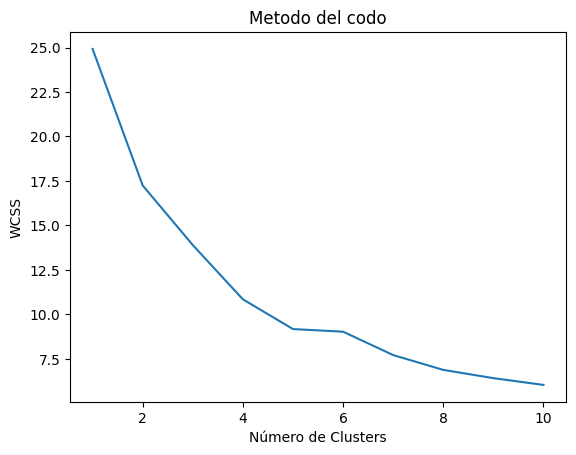

In [66]:
# metodo de codo para seleccion del número de clusters K 
plt.plot(range(1, 11), wcss)  
plt.title('Metodo del codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # WCSS es indicador de similitudes entre individuos
plt.show()

**Resultado:** En el Y (WCSS) el número de cluster cae y deja de disminuir drasticamente en el cluster número 3

### Inicializa los centroides de los clusters. Puedes hacerlo seleccionando aleatoriamente K puntos del conjunto de datos como los centroides iniciales o utilizando cualquier otro método mencionado en clase.

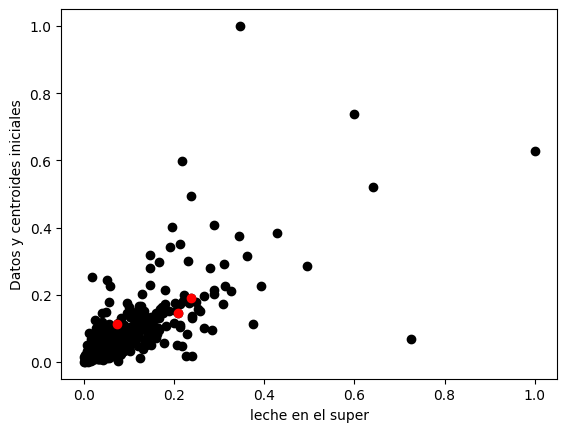

In [120]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (data_norm.sample(n=K))
plt.scatter(data_norm["Grocery"],data_norm["Milk"],c='black')
plt.scatter(Centroids["Grocery"],Centroids["Milk"],c='red')
plt.xlabel('leche en el super')
plt.ylabel('Datos y centroides iniciales')
plt.show()

los puntos rojos representan los 3 centroides de cada grupo, sin embargo estos puntos se toman al azar y cambian en cada ejecucion del programa

### Para cada punto en el conjunto de datos, calcula la distancia entre ese punto y cada uno de los centroides.

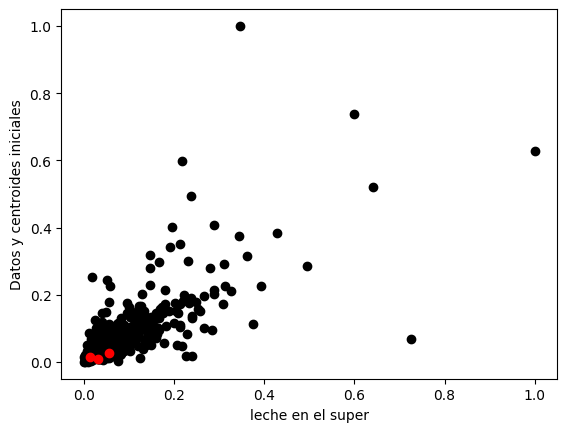

Distancias del punto 0: [0.16192475551862795, 0.13456979114505932, 0.18890513045102533]
Distancias del punto 1: [0.1915164604822493, 0.14241369096823384, 0.1793322485156788]
Distancias del punto 2: [0.23404288341350812, 0.1908957689899353, 0.21290699883575875]
Distancias del punto 3: [0.06891570133457695, 0.07389959533779226, 0.0964290009972397]
Distancias del punto 4: [0.1339473156249191, 0.16191375260560797, 0.21543506165830847]
Distancias del punto 5: [0.14571700353605704, 0.10082374105381936, 0.14700987166515828]
Distancias del punto 6: [0.11347652325255216, 0.08928842162387184, 0.14928315685922708]
Distancias del punto 7: [0.15729853523935136, 0.10484980603592767, 0.1488395428314869]
Distancias del punto 8: [0.13649325396092182, 0.06558801918277385, 0.11221994709444705]
Distancias del punto 9: [0.3042386877800043, 0.26546401916080714, 0.3009250903228483]
Distancias del punto 10: [0.2272235281846023, 0.1810989629235245, 0.19721442408421572]
Distancias del punto 11: [0.0621721367314

In [69]:
from scipy.spatial import distance

data_norm_distancia = pd.DataFrame(data_norm)

# Número de clusters
K = 3

# Seleccionamos observaciones aleatorias como centroides
Centroids = data_norm_distancia.sample(n=K)

# Graficamos los puntos y los centroides iniciales
plt.scatter(data_norm_distancia["Grocery"], data_norm_distancia["Milk"], c='black')
plt.scatter(Centroids["Grocery"], Centroids["Milk"], c='red')
plt.xlabel('leche en el super')
plt.ylabel('Datos y centroides iniciales')
plt.show()

# Calculamos la distancia entre cada punto y cada centroide
for index, row in data_norm.iterrows():
    distances = [distance.euclidean(row, centroid) for centroid in Centroids.values]
    print(f"Distancias del punto {index}: {distances}")


### Asigna cada punto al cluster cuyo centroide sea el más cercano. Puedes usar la distancia euclidiana para calcular la cercanía.

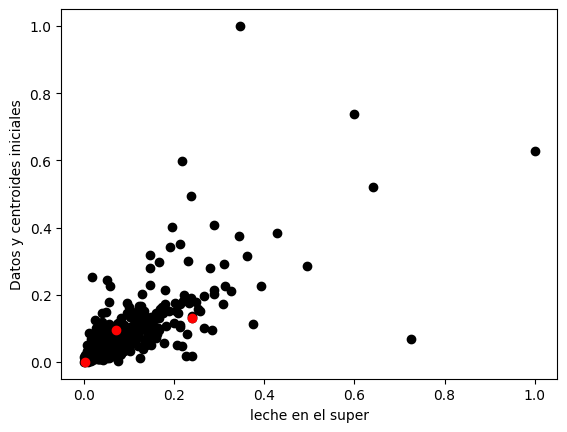

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.112940  0.130727  0.081464  0.003106          0.065427    0.027847   
1  0.062899  0.132824  0.103097  0.028548          0.080590    0.036984   
2  0.056622  0.119181  0.082790  0.039116          0.086052    0.163559   
3  0.118254  0.015536  0.045464  0.104842          0.012346    0.037234   
4  0.201626  0.072914  0.077552  0.063934          0.043455    0.108093   

   Cluster         1         2         3  
0        1  0.081425  0.102182  0.478523  
1        1  0.059695  0.114591  0.461141  
2        0  0.081858  0.092410  0.485297  
3        0  0.168949  0.023011  0.585275  
4        0  0.106669  0.052058  0.521443  


In [117]:
# Número de clusters
K = 3

# Seleccionamos observaciones aleatorias como centroides
Centroids = data_norm_distancia.sample(n=K)

# Graficamos los puntos y los centroides iniciales
plt.scatter(data_norm_distancia["Grocery"], data_norm_distancia["Milk"], c='black')
plt.scatter(Centroids["Grocery"], Centroids["Milk"], c='red')
plt.xlabel('leche en el super')
plt.ylabel('Datos y centroides iniciales')
plt.show()

# Asignamos cada punto al clúster cuyo centroide sea el más cercano
clusters = []
for index, row in data_norm_distancia.iterrows():
    distances = [distance.euclidean(row, centroid) for centroid in Centroids.values]
    nearest_centroid_index = np.argmin(distances)
    clusters.append(nearest_centroid_index)

# Agregamos la columna 'Cluster' al DataFrame con la asignación de clústeres
data_norm_distancia['Cluster'] = clusters

# Mostramos el DataFrame con la asignación de clústeres
print(data_norm_distancia.head())


### Una vez que todos los puntos han sido asignados a un cluster, recalcula el centroide de cada cluster. El nuevo centroide es el promedio de todos los puntos que han sido asignados a ese cluster.

### Repite los pasos 3 y 4 hasta que los centroides ya no cambien significativamente entre iteraciones, lo que indica que el algoritmo ha convergido, o hasta alcanzar un número máximo de iteraciones definido previamente.

In [125]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4
diff = 1
j=0

while(diff!=0):
    XD=data_norm_distancia
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Grocery"]-row_d["Grocery"])**2
            d2=(row_c["Milk"]-row_d["Milk"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        data_norm_distancia[i]=ED
        i=i+1

    C=[]
    for index,row in data_norm_distancia.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    data_norm_distancia["Cluster"]=C
    Centroids_new = data_norm_distancia.groupby(["Cluster"]).mean()[["Milk","Grocery"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Milk'] - Centroids['Milk']).sum() + (Centroids_new['Grocery'] - Centroids['Grocery']).sum()
        print(diff.sum())
    Centroids = data_norm_distancia.groupby(["Cluster"]).mean()[["Milk","Grocery"]]

0.0


El código fue ejecutado varias veces como entrenamiento hasta que los centroides no cambiaran y la convergencia fuera igual a 0.

Inicialmente definimos la diferencia como 1, y dentro de todo el ciclo, estamos calculando esta diferencia como la diferencia entre los centroides en la iteración anterior y la iteración actual.

Cuando esta diferencia es 0, detenemos el entrenamiento.

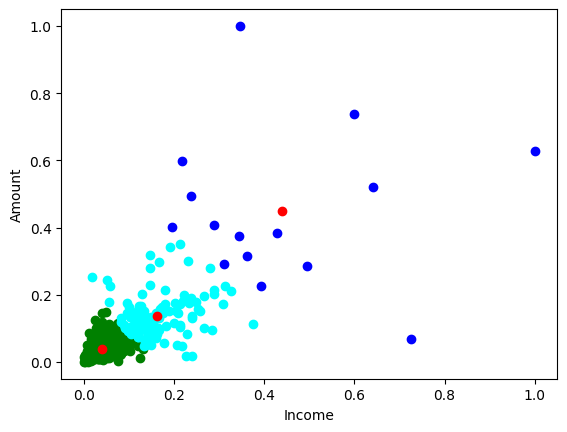

In [126]:
color=['blue','green','cyan']
for k in range(K):
    data=data_norm_distancia[data_norm_distancia["Cluster"]==k+1]
    plt.scatter(data["Grocery"],data["Milk"],c=color[k])
plt.scatter(Centroids["Grocery"],Centroids["Milk"],c='red')
plt.xlabel('Income')
plt.ylabel('Amount')
plt.show()

### Se realizó el k-means para los grupos de Milk y Grocery de estos por medio del método del codo se determinó la cantidad de centroides a utilizar por lo que fue lo más apropiado utilizar 3 centroides pues en el método del codo se observó un menor declive en tres centroides de 10, es complicado utilizar centroides al azar, pero después de la iteración los centroides tomaron posiciones más precisas.

### Se formaron 3 cluster con mayor aglomeración en cantidades bajas de .0 a .2, el segundo cluster más aglomerado se encuentra entre .2 y .4, por último el cluster con menos aglomeración tiene muy pocos datos y se encuentra disperso.
